# Preprocess

In [1]:
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram
import time
import random
import numpy as np
import pickle
from pprint import pprint
# from test_unitaries import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
num_data = 200 # original: 20000
Nu= num_data
Nq = 4 # number of qubit
Ns = 100
O = 100 
seed = 1

## Generate binary strings with n bits 

In [3]:
def generate_binary_strings(bit_count):
    binary_strings = []
    def genbin(n, bs=''):
        if len(bs) == n:
            binary_strings.append(bs)
        else:
            genbin(n, bs + '0')
            genbin(n, bs + '1')
    genbin(bit_count)
    return binary_strings

## function to evaluate eq 15 ( j(h_1, h_2.....h_k, i, l))

In [4]:
def get_j(Nq, k):
    keys = generate_binary_strings(Nq)    
    j_ = []
    for key in keys:
        temp = 1
        for i in range(k):
            power = 1 - int(key[i])
            temp = temp * ((-1)**power)
        j_.append(temp)

    j = dict(zip(keys, j_))
    return j

## Equation 17

In [5]:
def get_moment_correlation_J( k_, Nu,counts, j, Ns):
    J = []
    keys = list(j.keys())
    num = 0
    # for each unitary Nu
    for i in range(Nu):
        temp = 0 
        for key in keys:
            if key in counts[i]:
                wt = (counts[i][key])
            else:
                wt = 0
            val = j[key]
            temp = temp + (wt * val)
        num = num + (temp**k_)    
    J = num/((Ns**k_) * Nu)
    return J

In [6]:
def results_to_counts(results):
    counts = []
    for result in results:
        counts.append(result.get_counts())
    return counts

### generate training data for  RC and Haar with O = 100 , k = [1,2,3,4], k'= [1,2,3,4,5,6,7]

In [7]:
train_data_RC = []
O = 100
for i in range(O):
    
    print(i, "th data generation started")
    
    t1 = time.time()
    
    # generation of measurement outcomes
    results = []
    for ii in range(1, num_data + 1):
        qc = QuantumCircuit(Nq, Nq)
        qc.append(qi.random_clifford(Nq, seed = seed).to_instruction(), range(Nq))
        seed += 1
        qc.append(qi.random_unitary(2 ** Nq, seed = seed).to_instruction(), range(Nq))
        seed += 1
        qc.measure(range(Nq), range(Nq)[::-1])
        results.append(execute(qc, shots = Ns, backend = Aer.get_backend("qasm_simulator"), seed_simulator = 42, seed_transpiler = 42).result())
        # print(i, "...", ii, "th measurement finished")
    counts = []
    for result in results:
        counts.append(result.get_counts())
    
    # generation of input data
    train = []
    for k in range(1,5):
        j = get_j(Nq, k)
        for k_ in range(1,8):
            res = get_moment_correlation_J( k_, Nu, counts, j, Ns)
            train.append(res)
    train_data_RC.append(train)
    
    t2 = time.time()
    
    print(i, "th data generation finished, time:", t2 - t1, "s")

0 th data generation started
0 th data generation finished, time: 16.89932107925415 s
1 th data generation started
1 th data generation finished, time: 16.92016911506653 s
2 th data generation started
2 th data generation finished, time: 17.319568872451782 s
3 th data generation started
3 th data generation finished, time: 16.57029628753662 s
4 th data generation started
4 th data generation finished, time: 17.462834119796753 s
5 th data generation started
5 th data generation finished, time: 16.963291883468628 s
6 th data generation started
6 th data generation finished, time: 16.043248891830444 s
7 th data generation started
7 th data generation finished, time: 16.279088973999023 s
8 th data generation started
8 th data generation finished, time: 17.3160879611969 s
9 th data generation started
9 th data generation finished, time: 17.038276195526123 s
10 th data generation started
10 th data generation finished, time: 18.057678937911987 s
11 th data generation started
11 th data gener

93 th data generation finished, time: 17.970890998840332 s
94 th data generation started
94 th data generation finished, time: 18.624216079711914 s
95 th data generation started
95 th data generation finished, time: 17.879703044891357 s
96 th data generation started
96 th data generation finished, time: 18.2700297832489 s
97 th data generation started
97 th data generation finished, time: 18.25393009185791 s
98 th data generation started
98 th data generation finished, time: 18.411022186279297 s
99 th data generation started
99 th data generation finished, time: 18.928818941116333 s


In [8]:
train_data_Haar = []
O = 100
for i in range(O):
    
    print(i, "th data generation started")
    
    t1 = time.time()
    
    # generation of measurement outcomes
    results = []
    for ii in range(1, num_data + 1):
        qc = QuantumCircuit(Nq, Nq)
        qc.append(qi.random_unitary(2 ** Nq, seed = seed).to_instruction(), range(Nq))
        seed += 1
        qc.measure(range(Nq), range(Nq)[::-1])
        results.append(execute(qc, shots = Ns, backend = Aer.get_backend("qasm_simulator"), seed_simulator = 42, seed_transpiler = 42).result())
        # print(i, "...", ii, "th measurement finished")
    counts = []
    for result in results:
        counts.append(result.get_counts())
    
    # generation of input data
    train = []
    for k in range(1,5):
        j = get_j(Nq, k)
        for k_ in range(1,8):
            res = get_moment_correlation_J( k_, Nu, counts, j, Ns)
            train.append(res)
    train_data_Haar.append(train)
    
    t2 = time.time()
    
    print(i, "th data generation finished, time:", t2 - t1, "s")

0 th data generation started
0 th data generation finished, time: 1.0923728942871094 s
1 th data generation started
1 th data generation finished, time: 1.1240622997283936 s
2 th data generation started
2 th data generation finished, time: 1.1205649375915527 s
3 th data generation started
3 th data generation finished, time: 1.089939832687378 s
4 th data generation started
4 th data generation finished, time: 1.1121420860290527 s
5 th data generation started
5 th data generation finished, time: 1.1176121234893799 s
6 th data generation started
6 th data generation finished, time: 1.115211009979248 s
7 th data generation started
7 th data generation finished, time: 1.1032257080078125 s
8 th data generation started
8 th data generation finished, time: 1.0073010921478271 s
9 th data generation started
9 th data generation finished, time: 1.0137128829956055 s
10 th data generation started
10 th data generation finished, time: 1.0847899913787842 s
11 th data generation started
11 th data ge

93 th data generation finished, time: 1.0054688453674316 s
94 th data generation started
94 th data generation finished, time: 1.0565977096557617 s
95 th data generation started
95 th data generation finished, time: 1.0782461166381836 s
96 th data generation started
96 th data generation finished, time: 1.3843798637390137 s
97 th data generation started
97 th data generation finished, time: 1.1690707206726074 s
98 th data generation started
98 th data generation finished, time: 1.116896152496338 s
99 th data generation started
99 th data generation finished, time: 1.0719728469848633 s


In [11]:
plt.figure(figsize=(10, 10 * 100 / 28))

<Figure size 720x2571.43 with 0 Axes>

<Figure size 720x2571.43 with 0 Axes>

<AxesSubplot:>

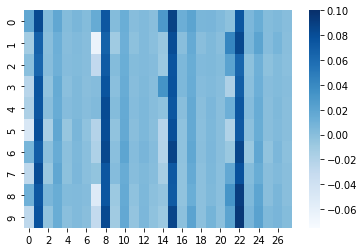

In [18]:
sns.heatmap(train_data_Haar[:10], cmap='Blues', vmax=0.10, vmin=-0.075)

<AxesSubplot:>

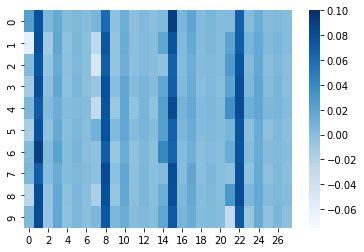

In [19]:
sns.heatmap(train_data_RC[:10], cmap='Blues', vmax=0.10, vmin=-0.075)

In [20]:
with open("train_inputs_rc_simulator.pkl", "wb") as f:
    pickle.dump(train_data_RC, f)

In [21]:
with open("train_inputs_haar_simulator.pkl", "wb") as f:
    pickle.dump(train_data_Haar, f)